## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from fastai import *
from fastai.tabular import * 

SEED = 666

# magic word for producing visualizations in notebook
%matplotlib inline

# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

In [2]:
census_columns = [
    'age',
    'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'wage per hour',
    'enroll in edu inst last wk',
    'marital status',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'instance weight',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'num persons worked for employer',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    'fill inc questionnaire for veteran\'s admin',
    'veterans benefits',
    'weeks worked in year',
    'year',
    'income class'
]

features_to_drop = [
    'instance weight', # Ignored
    # more than 70% values missing
    'enroll in edu inst last wk',
    'member of a labor union',
    'reason for unemployment',
    'region of previous residence',
    'state of previous residence',
    'migration prev res in sunbelt',
    'family members under 18',
    "fill inc questionnaire for veteran's admin",
    # more than 50% values missing
    'class of worker',
    'major industry code',
    'major occupation code',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    # Vlad Manolache
    "year", # good call Vlad Manolache
    'capital gains',
    'capital losses'
]

categorical_features = [
    #'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'marital status',
    #'major industry code',
    #'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'full or part time employment stat',
    'tax filer stat',
    'detailed household and family stat',
    'detailed household summary in household',
    #'migration code-change in msa',
    #'migration code-change in reg',
    #'migration code-move within reg',
    #'live in this house 1 year ago',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    'veterans benefits',
    #'year'
]

numerical_features = [
    'age',
    'wage per hour',
    #'capital gains',
    #'capital losses',  
    'capital gains loss', #Vlad Manolache
    'dividends from stocks',
    'num persons worked for employer',
    'weeks worked in year'
]


label_feature = 'income class'

## Load Datasets

### Train

In [3]:
# The C engine doesn't support RegEx so we set it to Python to avoid the warning
census = pd.read_csv('data/census-income.data', header=None, sep=',\s', na_values=['?', 'Do not know', 'Not identifiable'], engine='python')

In [4]:
census.columns = census_columns
census.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital status                              199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

### Load Test Dataset

In [6]:
# The C engine doesn't support RegEx so we set it to Python to avoid the warning
census_test = pd.read_csv('data/census-income.test', header=None, sep=',\s', na_values=['?', 'Do not know', 'Not identifiable'], engine='python')

In [7]:
census_test.columns = census_columns
census_test.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


 ## Clean Datasets

In [8]:
class DefaultZero(dict):
    def __missing__(self, key):
        return 0

def clean_dataset(df):
    # replace field that contains Not in Universe with NaN
    df = df.replace(r'Not in universe\w*?', np.nan, regex=True)
    
    # Fill NaN
    df['hispanic origin'] = df['hispanic origin'].fillna(df['hispanic origin'].mode()[0])
    df['country of birth father'] = df['country of birth father'].fillna(df['country of birth father'].mode()[0])
    df['country of birth mother'] = df['country of birth mother'].fillna(df['country of birth mother'].mode()[0])
    df['country of birth self'] = df['country of birth self'].fillna(df['country of birth self'].mode()[0])
    
    # Feature Engineering
    
    # From Vlad Manolache
    # -------------------------

    # Collapse marrital status
    marrital_status_single = ['Never married', 'Separated', 'Divorced', 'Widowed']
    marrital_status_married = ['Married-civilian spouse present', 'Married-spouse absent', 'Married-A F spouse present']
    df['marital status'] = df['marital status'].replace(marrital_status_single, 'Single')
    df['marital status'] = df['marital status'].replace(marrital_status_married, 'Married')
    
    # Inspired by the winners
    map_education = {
        'Doctorate degree(PhD EdD)': 3,
        'Prof school degree (MD DDS DVM LLB JD)': 3,
        'Masters degree(MA MS MEng MEd MSW MBA)': 3,
        'Bachelors degree(BA AB BS)': 2,
        'Associates degree-academic program': 2,
        'Associates degree-occup /vocational': 2,
        'Some college but no degree': 1,
        '12th grade no diploma': 1,
        '11th grade': 1,
        '10th grade': 1,
        '9th grade': 1,
        'High school graduate': 1,
        '7th and 8th grade': 0,
        '5th or 6th grade': 0,
        '1st 2nd 3rd or 4th grade': 0,
        'Less than 1st grade': 0,
        'Children': 0
    }
    
    df['education'] = df['education'].map(map_education)
    
    # From Vlad Manolache
    df['capital gains loss'] = df['capital gains'] - df['capital losses']
    
    # From Jan Jakob Lameijer
    map_race = {
        'White': 1,
        'Black': 0,
        'Asian or Pacific Islander': 0,
        'Other': 0,
        'Amer Indian Aleut or Eskimo': 0
    }

    df['race'] = df['race'].map(map_race)

    map_hisp = {
        'All other': 0,
        'Mexican (Mexicano)': 1,
        'Mexican-American': 1,
        'Puerto Rican': 1,
        'Central or South American': 1,
        'Other Spanish': 1,
        'Chicano': 1,
        'Cuban': 1
    }
    df['hispanic origin'] = df['hispanic origin'].map(map_hisp)

    map_birth = DefaultZero({'United-States': 1})
    df['country of birth self'] = df['country of birth self'].map(map_birth)
    df['country of birth father'] = df['country of birth father'].map(map_birth)
    df['country of birth mother'] = df['country of birth mother'].map(map_birth)
    
    map_birth = DefaultZero({'United-States': 1})
    df['country of birth self'] = df['country of birth self'].map(map_birth)
    df['country of birth father'] = df['country of birth father'].map(map_birth)
    df['country of birth mother'] = df['country of birth mother'].map(map_birth)
    
    # From Andrei Ratushin
    
    #First - I shall collect grandchilds 18+, as their numbers are non-representative (<1%) in current segmentation
    df.loc[df['detailed household and family stat'].str.contains('Grandchild'),'detailed household and family stat']='Child 18+'
    df.loc[df['detailed household and family stat'].str.contains('Child'),'detailed household summary in household']='Child 18+'
    df.loc[df['detailed household and family stat'].str.contains('Child'),'detailed household and family stat']='Child 18+'
    
    # Drop features
    df = df.drop(features_to_drop, axis=1)
    
    # Encode income class column
    df['income class'] = df['income class'].map({'- 50000.': 0, '50000+.': 1})

    return df

### Train

In [9]:
census = clean_dataset(census)
census.head()

,age,detailed industry recode,detailed occupation recode,education,wage per hour,marital status,race,hispanic origin,sex,full or part time employment stat,...,num persons worked for employer,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,income class,capital gains loss
0,73,0,0,1,0,Single,1,0,Female,Not in labor force,...,0,0,0,0,Native- Born in the United States,0,2,0,0,0
1,58,4,34,1,0,Single,1,0,Male,Children or Armed Forces,...,1,0,0,0,Native- Born in the United States,0,2,52,0,0
2,18,0,0,1,0,Single,0,0,Female,Not in labor force,...,0,0,0,0,Foreign born- Not a citizen of U S,0,2,0,0,0
3,9,0,0,0,0,Single,1,0,Female,Children or Armed Forces,...,0,0,0,0,Native- Born in the United States,0,0,0,0,0
4,10,0,0,0,0,Single,1,0,Female,Children or Armed Forces,...,0,0,0,0,Native- Born in the United States,0,0,0,0,0


In [10]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 24 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   age                                      199523 non-null  int64 
 1   detailed industry recode                 199523 non-null  int64 
 2   detailed occupation recode               199523 non-null  int64 
 3   education                                199523 non-null  int64 
 4   wage per hour                            199523 non-null  int64 
 5   marital status                           199523 non-null  object
 6   race                                     199523 non-null  int64 
 7   hispanic origin                          199523 non-null  int64 
 8   sex                                      199523 non-null  object
 9   full or part time employment stat        199523 non-null  object
 10  dividends from stocks                    199

In [11]:
census.to_csv('data/train.csv', index=False)

### Test

In [12]:
census_test = clean_dataset(census_test)
census_test.head()

,age,detailed industry recode,detailed occupation recode,education,wage per hour,marital status,race,hispanic origin,sex,full or part time employment stat,...,num persons worked for employer,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year,income class,capital gains loss
0,38,6,36,0,0,Married,1,1,Female,Full-time schedules,...,4,0,0,0,Foreign born- Not a citizen of U S,0,2,12,0,0
1,44,37,12,2,0,Married,1,0,Female,PT for econ reasons usually PT,...,1,0,0,0,Native- Born in the United States,0,2,26,0,0
2,2,0,0,0,0,Single,1,1,Male,Children or Armed Forces,...,0,0,0,0,Native- Born in the United States,0,0,0,0,0
3,35,29,3,1,0,Single,1,0,Female,Children or Armed Forces,...,5,0,0,0,Native- Born in the United States,2,2,52,0,0
4,49,4,34,1,0,Single,1,0,Male,Full-time schedules,...,4,0,0,0,Native- Born in the United States,0,2,50,0,0


In [13]:
census_test.to_csv('data/test.csv', index=False)

## Sampling

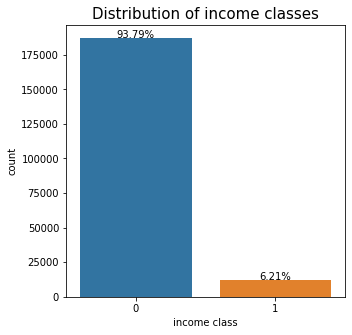

In [14]:
plt.figure(figsize=(5, 5))
total = census.shape[0]
ax = sns.countplot(x="income class", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{0:.2%}'.format(height/total),
            ha="center")
plt.title('Distribution of income classes', fontsize=15)
plt.show()

In [15]:
from imblearn.over_sampling import SMOTENC
cat_indexes = [census.columns.get_loc(c) for c in categorical_features if c in census]
sm = SMOTENC(categorical_features=cat_indexes, random_state=SEED)
X_res, y_res = sm.fit_resample(census.drop('income class', axis=1), census['income class'])
census_res = pd.concat([X_res, y_res], axis=1)

Using TensorFlow backend.


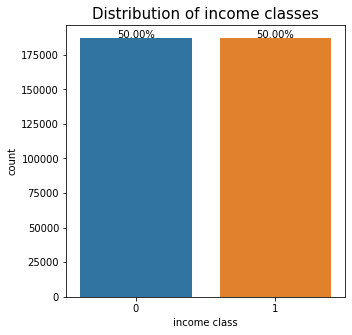

In [16]:
plt.figure(figsize=(5, 5))
total = census_res.shape[0]
ax = sns.countplot(x="income class", data=census_res)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{0:.2%}'.format(height/total),
            ha="center")
plt.title('Distribution of income classes', fontsize=15)
plt.show()

## Fast.ai

In [17]:
procs = [FillMissing, Categorify, Normalize]

In [18]:
test = TabularList.from_df(census_test.drop('income class', axis=1), 
                           cat_names=categorical_features, 
                           cont_names=numerical_features, 
                           procs=procs)

In [19]:
train = TabularList.from_df(census_res, path='temp', 
                            cat_names=categorical_features, 
                            cont_names=numerical_features, 
                            procs=procs)

In [20]:
data = (train
            .split_by_rand_pct(valid_pct=0.2, seed=SEED)
            .label_from_df(cols=label_feature)
            .add_test(test, label=0)
            .databunch())

In [21]:
data.show_batch(rows=10)

detailed industry recode,detailed occupation recode,education,marital status,race,hispanic origin,sex,full or part time employment stat,tax filer stat,detailed household and family stat,detailed household summary in household,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,age,wage per hour,capital gains loss,dividends from stocks,num persons worked for employer,weeks worked in year,target
34,17,2,Single,1,0,Male,Full-time schedules,Single,Child 18+,Child 18+,0,0,0,Native- Born in the United States,0,2,0.5495,-0.1914,0.9066,-0.1649,0.9614,0.7427,1
0,0,0,Single,0,1,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,0,0,0,Foreign born- Not a citizen of U S,0,2,1.5132,-0.1914,-0.1939,-0.1649,-1.1842,-1.5083,0
29,25,1,Married,1,1,Male,Children or Armed Forces,Joint both under 65,Spouse of householder,Spouse of householder,0,0,0,Native- Born in Puerto Rico or U S Outlying,0,2,0.4424,-0.1914,-0.1939,-0.1649,1.3906,0.7427,0
45,5,2,Married,1,0,Male,Full-time schedules,Joint both under 65,Householder,Householder,0,0,0,Native- Born in the United States,0,2,-0.2001,-0.1914,-0.1939,-0.1649,0.9614,0.7427,1
33,16,1,Single,1,0,Female,Full-time schedules,Single,Householder,Householder,0,0,0,Native- Born in the United States,0,2,0.4424,-0.1914,-0.1939,-0.1649,-0.7550,0.7427,0
16,3,3,Married,1,0,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,0,0,0,Native- Born in the United States,0,2,0.2282,-0.1914,-0.1939,-0.0464,0.9614,0.7427,1
41,6,2,Married,1,0,Male,Full-time schedules,Joint both under 65,Householder,Householder,0,0,0,Native- Born in the United States,0,2,0.1747,8.8708,-0.3531,-0.1649,-0.3259,0.7427,1
29,26,1,Single,1,0,Female,Children or Armed Forces,Single,Child 18+,Child 18+,0,0,0,Native- Born in the United States,0,2,-0.4143,-0.1914,-0.1939,-0.1452,-0.7550,-0.7724,0
4,14,2,Married,1,0,Male,PT for non-econ reasons usually FT,Joint both under 65,Householder,Householder,0,0,0,Native- Born in the United States,0,2,0.4424,-0.1914,0.4305,-0.1649,1.3906,0.7427,0
45,2,3,Married,1,0,Male,Full-time schedules,Joint both under 65,Householder,Householder,0,0,0,Native- Born in the United States,0,2,0.3353,-0.1914,-0.3497,0.2528,0.5323,0.7427,1


## Defining a model

In [22]:
learn = tabular_learner(data, 
                        layers=[64, 32, 16], 
                        #ps=[0.001,0.01], 
                        emb_drop=0.04, 
                        metrics=AUROC())

In [23]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(53, 15)
    (1): Embedding(48, 14)
    (2): Embedding(5, 4)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(9, 5)
    (8): Embedding(7, 5)
    (9): Embedding(20, 9)
    (10): Embedding(9, 5)
    (11): Embedding(2, 2)
    (12): Embedding(2, 2)
    (13): Embedding(2, 2)
    (14): Embedding(6, 4)
    (15): Embedding(4, 3)
    (16): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=91, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02
Min loss divided by 10: 1.10E-01


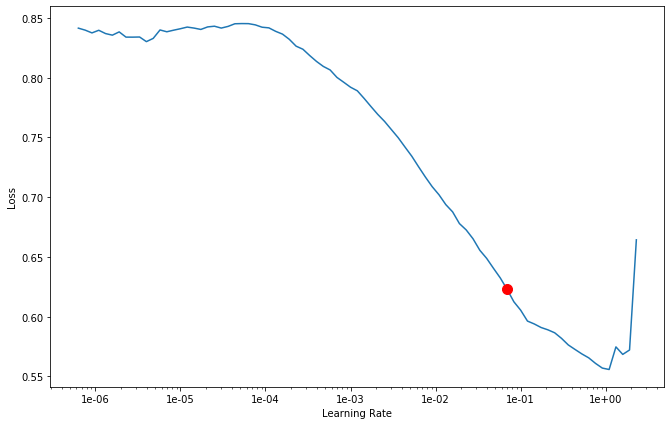

In [25]:
learn.recorder.plot(suggestion=True)

In [26]:
learn.fit_one_cycle(5, 6.92e-2, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.319650,0.716515,0.944374,02:36
1,0.330505,0.310416,0.941778,02:34
2,0.313059,0.289052,0.946583,02:38
3,0.295203,0.290077,0.946840,02:46
4,0.266317,0.255842,0.959277,02:45


epoch,train_loss,valid_loss,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.75E-05


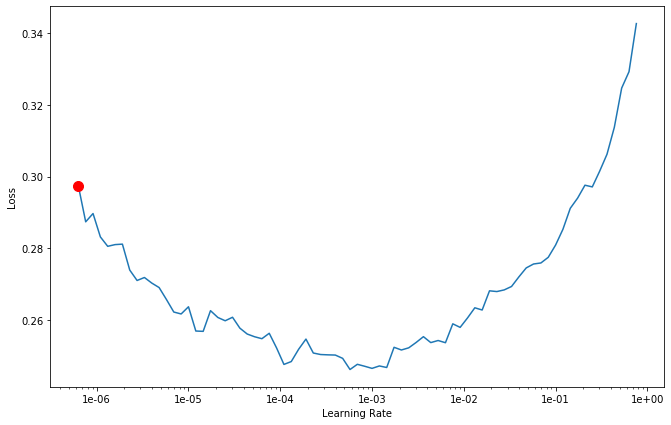

In [27]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [28]:
learn.fit_one_cycle(2, 6.31e-7, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.276579,0.256882,0.958916,02:40
1,0.275867,0.256689,0.958807,02:40


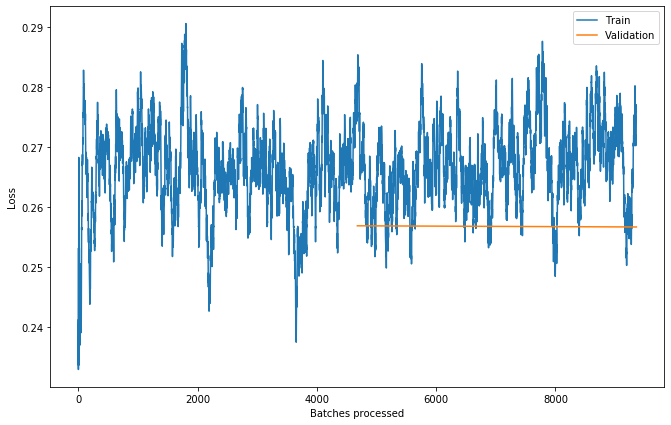

In [29]:
# Analyse our model
learn.model
learn.recorder.plot_losses()

In [30]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [31]:
from sklearn.metrics import roc_curve, classification_report, auc

print(classification_report(census_test['income class'], labels))
fpr, tpr, thresholds = roc_curve(census_test['income class'], labels)

print("AUC: %s" % auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     93576
           1       0.29      0.82      0.43      6186

    accuracy                           0.87     99762
   macro avg       0.64      0.84      0.68     99762
weighted avg       0.94      0.87      0.89     99762

AUC: 0.8441917976680334


## Prepare submission

In [ ]:
# create submission file to submit in Kaggle competition
submission = pd.DataFrame({'income class': labels})
submission.reset_index(inplace=True)
submission.to_csv('temp/submission_fastai.csv', index=False)
submission.head()